In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [4]:
img=cv2.imread('test_images/virat1.jpg')

In [5]:
face_cascade= cv2.CascadeClassifier('opencv:haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('opencv:haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(img,1.3,5)
faces

array([[670, 285, 671, 671]], dtype=int32)

In [6]:
x,y,w,h=faces[0]
x,y,w,h

(670, 285, 671, 671)

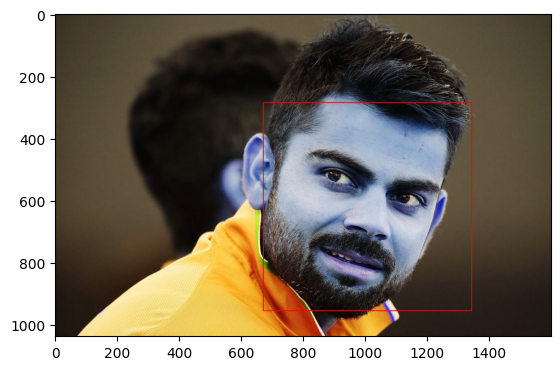

In [7]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

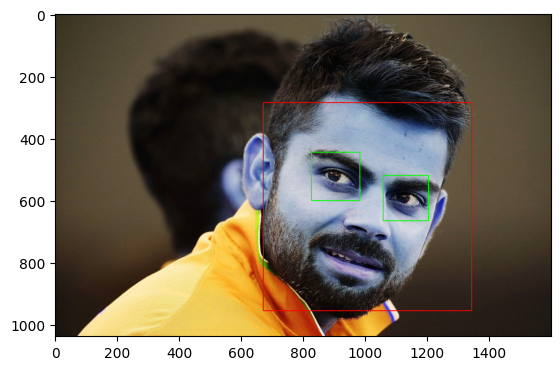

In [8]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()
        


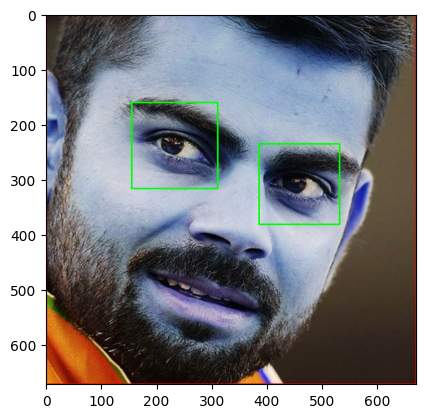

In [9]:
plt.imshow(roi_color,cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    return None

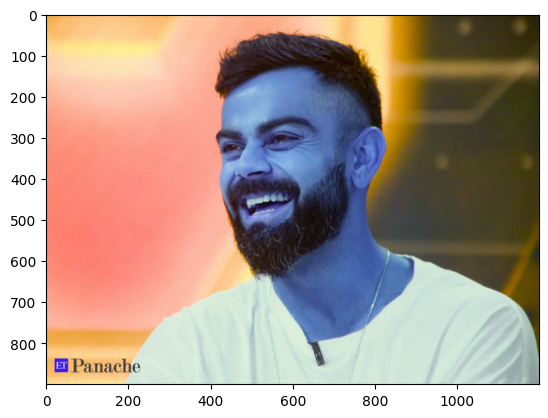

In [11]:
original_image = cv2.imread('test_images/virat2.jpg')
plt.imshow(original_image)

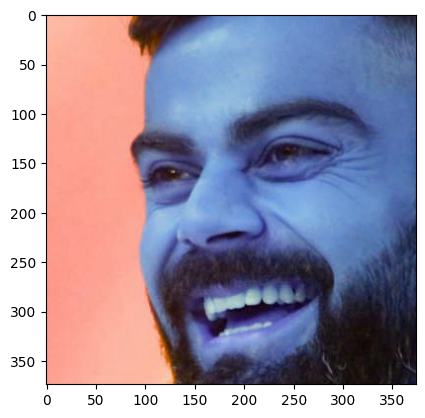

In [12]:
cropped_image = get_cropped_image_if_2_eyes('test_images/virat2.jpg')
plt.imshow(cropped_image)

In [13]:
path_to_data="images_dataset"
path_to_cr_data="cropped"


In [14]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [15]:
img_dirs

['images_dataset/maria_sharapova',
 'images_dataset/virat_kohli',
 'images_dataset/lionel_messi',
 'images_dataset/serena_williams',
 'images_dataset/roger_federer']

In [16]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [17]:
cropped_img_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color= get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder= path_to_cr_data +"/"+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                
                
                print("Generating cropped images in folder: " ,cropped_folder)
            
            cropped_File_name= celebrity_name+ str(count) + ".png"
            
            cropped_file_path= cropped_folder+"/"+cropped_File_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count+=1
    

Generating cropped images in folder:  cropped/maria_sharapova
Generating cropped images in folder:  cropped/virat_kohli
Generating cropped images in folder:  cropped/lionel_messi
Generating cropped images in folder:  cropped/serena_williams
Generating cropped images in folder:  cropped/roger_federer


In [29]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [30]:
class_dict={}
count=0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
    
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [31]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        
        combined_img=np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

[ WARN:0@305.042] global loadsave.cpp:248 findDecoder imread_('cropped/maria_sharapova/maria_sharapova8.png'): can't open/read file: check file path/integrity
[ WARN:0@305.297] global loadsave.cpp:248 findDecoder imread_('cropped/maria_sharapova/maria_sharapova21.png'): can't open/read file: check file path/integrity
[ WARN:0@305.381] global loadsave.cpp:248 findDecoder imread_('cropped/maria_sharapova/maria_sharapova27.png'): can't open/read file: check file path/integrity
[ WARN:0@305.452] global loadsave.cpp:248 findDecoder imread_('cropped/virat_kohli/virat_kohli2.png'): can't open/read file: check file path/integrity
[ WARN:0@305.457] global loadsave.cpp:248 findDecoder imread_('cropped/virat_kohli/virat_kohli5.png'): can't open/read file: check file path/integrity
[ WARN:0@305.467] global loadsave.cpp:248 findDecoder imread_('cropped/virat_kohli/virat_kohli8.png'): can't open/read file: check file path/integrity
[ WARN:0@305.607] global loadsave.cpp:248 findDecoder imread_('cropp

In [32]:
len(x[0])

4096

In [33]:
len(y)

165

In [34]:
x=np.array(x).reshape(len(x),4096).astype(float)


In [35]:
x.shape

(165, 4096)

In [36]:
len(y)

165

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=10)

pipe=Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

pipe.fit(x_train,y_train)

pipe.score(x_test,y_test)

0.9696969696969697

In [39]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4

    accuracy                           0.97        33
   macro avg       0.97      0.98      0.98        33
weighted avg       0.97      0.97      0.97        33


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

In [52]:
from sklearn.model_selection import GridSearchCV

algos={
    'svm':{
        'model': SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel' :['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
    
}

In [53]:
scores=[]
best_estimators={}

import pandas as pd
for algo,mp in algos.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5, return_train_score=False)
    
    clf.fit(x_train,y_train)
    
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] =clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

df

/Users/abrar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abrar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

,model,best_score,best_params
0,svm,0.819658,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.696866,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.833903,{'logisticregression__C': 1}


In [54]:
best_estimators['svm'].score(x_test,y_test)

0.9393939393939394

In [55]:
best_clf=best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 5,  0,  0,  0,  1],
       [ 0, 12,  1,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  4]])

Text(95.72222222222221, 0.5, 'Truth')

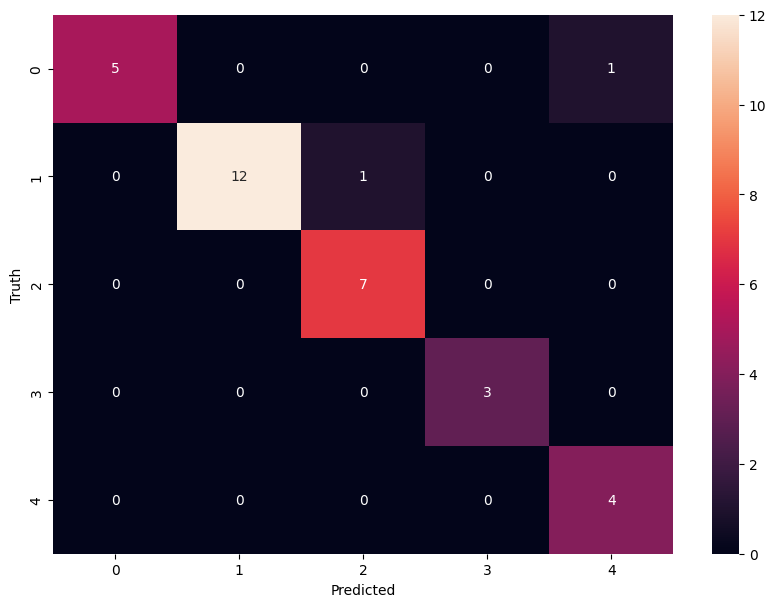

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')




In [57]:
import joblib

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [58]:
import json
with open("class_dictionary.json",'w') as f:
    f.write(json.dumps(class_dict))